### Step 1: Importing Libraries
To begin, we import essential libraries for data analysis and visualization.

- **pandas**: Used for data manipulation and analysis, particularly helpful for handling tabular data.
- **numpy**: Provides support for large, multi-dimensional arrays and matrices, as well as mathematical functions.
- **matplotlib.pyplot**: A plotting library used to create static, interactive, and animated visualizations.
- **seaborn**: Built on top of matplotlib, seaborn is used for making statistical graphics with an aesthetic appeal.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Loading the Dataset
We load the cancer dataset into a DataFrame using **pandas**. This dataset will be used to train and test the K-Nearest Neighbors (KNN) model for predicting cancer.



In [ ]:
df=pd.read_csv("/content/Cancer_Data.csv")

### Step 3: Displaying the First Few Rows of the Dataset
Using **`head()`**, we can quickly view the first five rows of the dataset. This helps us understand the structure of the data, including the columns and initial values.



In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Step 4: Dropping Unnecessary Columns
We remove the first and the 33rd columns from the dataset using **`drop()`**. This is often done to eliminate irrelevant information that doesn't contribute to the model, simplifying the data for analysis.



In [ ]:
df=df.drop(df.columns[[0,32]],axis=1)

### Step 5: Checking the Dataset Shape
We use **`shape`** to check the dimensions of the dataset. This command returns the number of rows and columns, helping us confirm the size of our data after cleaning.



In [ ]:
df.shape

(569, 31)

### Step 6: Viewing Dataset Information
The **`info()`** method provides a summary of the dataset, including the column names, data types, and non-null counts. This step helps us identify any missing data and understand the data types for each feature.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Step 7: Converting Data Type for Diagnosis Column
We convert the **`diagnosis`** column to a categorical data type. This step is useful for non-numeric data, as it allows us to efficiently store categorical variables and facilitates modeling later on.




In [ ]:
df['diagnosis']=df['diagnosis'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diagnosis                569 non-null    category
 1   radius_mean              569 non-null    float64 
 2   texture_mean             569 non-null    float64 
 3   perimeter_mean           569 non-null    float64 
 4   area_mean                569 non-null    float64 
 5   smoothness_mean          569 non-null    float64 
 6   compactness_mean         569 non-null    float64 
 7   concavity_mean           569 non-null    float64 
 8   concave points_mean      569 non-null    float64 
 9   symmetry_mean            569 non-null    float64 
 10  fractal_dimension_mean   569 non-null    float64 
 11  radius_se                569 non-null    float64 
 12  texture_se               569 non-null    float64 
 13  perimeter_se             569 non-null    float64 
 14  area_se   

### Step 8: Generating Summary Statistics
Using **`describe()`**, we generate summary statistics for the dataset. This includes key information like mean, standard deviation, minimum, and maximum values, which helps us understand the distribution and range of each feature.



In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Dropping the First Column from a DataFrame



In [ ]:
df_cont=df.drop(df.columns[[0]],axis=1)

In [ ]:
df_cont.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Standardizing the DataFrame using `StandardScaler`




In [ ]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS_X=SS.fit_transform(df_cont)
SS_X=pd.DataFrame(SS_X,columns=df_cont.columns)
SS_X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Selecting the Categorical Column from the DataFrame



In [ ]:
df_cat = df[['diagnosis']]
df_cat.head()


,diagnosis
0,M
1,M
2,M
3,M
4,M


### Encoding the 'diagnosis' Column Using LabelEncoder



In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_cat['diagnosis']=LE.fit_transform(df_cat['diagnosis'])
df_cat.head()

<ipython-input-14-87d8300979d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['diagnosis']=LE.fit_transform(df_cat['diagnosis'])


,diagnosis
0,1
1,1
2,1
3,1
4,1


### Concatenating Standardized Features with Categorical Data



In [ ]:
df_new=pd.concat([SS_X,df_cat],axis=1)
df_new.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


### Defining the Feature Matrix and Target Variable



In [ ]:
SS_X
Y=df_cat['diagnosis']

### Splitting the Data into Training and Test Sets




In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(SS_X,Y,test_size=0.3,random_state=45)


### Training a K-Nearest Neighbors (KNN) Classifier



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)

KNeighborsClassifier()

### Making Predictions with the Trained KNN Model



In [ ]:
Y_pred_train=model.predict(X_train)
Y_pred_test=model.predict(X_test)

### Evaluating the KNN Model Performance




In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_train,Y_pred_train)
print(cm)
trainingscore=accuracy_score(Y_train,Y_pred_train)
print("Train Accuracy",np.round(trainingscore,2))
testscore=accuracy_score(Y_test,Y_pred_test)
print("Test Accuracy",np.round(testscore,2))

[[246   1]
 [  8 143]]
Train Accuracy 0.98
Test Accuracy 0.96


### Cross-Validation for KNN Model Performance




In [ ]:
training_acc=[]
test_acc=[]
for i in range(1,101):
  X_train,X_test,Y_train,Y_test=train_test_split(SS_X,Y,test_size=0.3,random_state=i)
  model=KNeighborsClassifier(n_neighbors=5)
  model.fit(X_train,Y_train)
  Y_pred_train=model.predict(X_train)
  Y_pred_test=model.predict(X_test)
  training_acc.append(accuracy_score(Y_train,Y_pred_train))
  test_acc.append(accuracy_score(Y_test,Y_pred_test))
print("cross validation Training accuracy",np.round(np.mean(training_acc),2))
print("cross validation Test accuracy",np.round(np.mean(test_acc),2))

cross validation Training accuracy 0.98
cross validation Test accuracy 0.96


### Hyperparameter Tuning for K-Nearest Neighbors (KNN)


In [ ]:
training_acc_list=[]
test_acc_list=[]
for k in range(5,18,2):
  training_acc=[]
  test_acc=[]
  for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(SS_X,Y,test_size=0.3,random_state=i)
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,Y_train)
    Y_pred_train=model.predict(X_train)
    Y_pred_test=model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))
  training_acc_list.append(np.round(np.mean(training_acc),2))
  test_acc_list.append(np.round(np.mean(test_acc),2))
print("Training Accuracy List:", training_acc_list)
print("Test Accuracy List:", test_acc_list)

Training Accuracy List: [0.98, 0.97, 0.97, 0.97, 0.97, 0.96, 0.96]
Test Accuracy List: [0.96, 0.96, 0.97, 0.96, 0.96, 0.96, 0.96]


### Visualizing Training and Test Accuracy for Different `k` Values



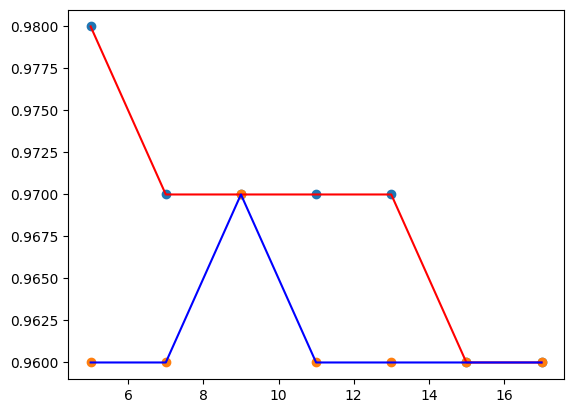

In [ ]:
plt.scatter(range(5,18,2),training_acc_list)
plt.plot(range(5,18,2),training_acc_list,color="red")
plt.scatter(range(5,18,2),test_acc_list)
plt.plot(range(5,18,2),test_acc_list,color="blue")
plt.show()

In [ ]:
import pickle
filename = 'k_nearest_neighbor_model.pkl'
pickle.dump(model, open(filename, 'wb'))